In [25]:
import confirm.outlaw.nb_util as nb_util
nb_util.setup_nb()

import pickle
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import jax
# Run on CPU because a concurrent process is probably running on GPU.
jax.config.update('jax_platform_name', 'cpu')

import confirm.mini_imprint.lewis_drivers as lts
from confirm.lewislib import lewis

import adastate
from criterion import Criterion
from diagnostics import lamstar_histogram

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
name = '4d_full'
params = {
    "n_arms": 4,
    "n_stage_1": 50,
    "n_stage_2": 100,
    "n_stage_1_interims": 2,
    "n_stage_1_add_per_interim": 100,
    "n_stage_2_add_per_interim": 100,
    "stage_1_futility_threshold": 0.15,
    "stage_1_efficacy_threshold": 0.7,
    "stage_2_futility_threshold": 0.2,
    "stage_2_efficacy_threshold": 0.95,
    "inter_stage_futility_threshold": 0.6,
    "posterior_difference_threshold": 0,
    "rejection_threshold": 0.05,
    "key": jax.random.PRNGKey(0),
    "n_table_pts": 20,
    "n_pr_sims": 100,
    "n_sig2_sims": 20,
    "batch_size": int(2**12),
    "cache_tables": f"./{name}/lei_cache.pkl",
}
lei_obj = lewis.Lewis45(**params)

In [89]:
with open(f"./{name}/data_params.pkl", "rb") as f:
    P, D = pickle.load(f)
load_iter = 'latest'
S, load_iter, fn = adastate.load(name, load_iter)

loading checkpoint 4d_full/142.pkl


In [90]:
cr = Criterion(lei_obj, P, S, D)

tuning for 2048 simulations with 1 tiles and batch size (1, 16384)
0.3205912113189697
0.1685020923614502


In [69]:
S.sim_sizes[cr.dangerous]

array([2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, ..., 2048, 2048, 2048, 2048,
       2048, 2048, 2048, 2048, 2048, 2048])

In [70]:
cr.alpha_cost[cr.dangerous]

array([0.00819207, 0.00819207, 0.00820227, 0.00819763, 0.00819351, 0.00819351, 0.00819763,
       0.00819763, 0.00820227, 0.00819763, ..., 0.0011714 , 0.00116031, 0.00117099, 0.00117122,
       0.00115767, 0.00116738, 0.00117113, 0.00116052, 0.00116064, 0.00116043])

In [71]:
np.sum(cr.impossible_refine_orig)

0

In [73]:
cr.twb_worst_tile_lam_max

0.17633754043073874

In [74]:
cr.twb_worst_tile_lam_min

0.07903369342494342

In [75]:
assert S.twb_max_lam[cr.twb_worst_tile] == np.min(S.twb_max_lam)
assert S.twb_min_lam[cr.twb_worst_tile] == np.min(S.twb_min_lam[cr.ties])

In [76]:
S.alpha0[cr.dangerous]

array([0.01680793, 0.01680793, 0.01679773, 0.01680237, 0.01680649, 0.01680649, 0.01680237,
       0.01680237, 0.01679773, 0.01680237, ..., 0.0238286 , 0.02383969, 0.02382901, 0.02382878,
       0.02384233, 0.02383262, 0.02382887, 0.02383948, 0.02383936, 0.02383957])

In [77]:
S.B_lam[cr.dangerous].min(axis=1)

array([0.03377998, 0.03377998, 0.03377998, 0.03749124, 0.03377998, 0.03377998, 0.03749124,
       0.03749124, 0.03377998, 0.03749124, ..., 0.05334924, 0.05372104, 0.04957355, 0.0477407 ,
       0.04957355, 0.04957355, 0.04957355, 0.05093597, 0.05093597, 0.05372104])

In [78]:
twb_B_lamss = S.twb_min_lam[cr.B_lamss_idx]
twb_B_lamss

array([0.04471135, 0.04647128, 0.04433718, 0.05172274, 0.04444252, 0.04614022, 0.04484342,
       0.04704175, 0.0440812 , 0.04395381, 0.04392044, 0.04388027, 0.04410004, 0.04388027,
       0.04463689, 0.0437846 , 0.04375985, 0.04404414, 0.04433718, 0.04531363, 0.04626901,
       0.04471135, 0.05045566, 0.04504043, 0.04696774, 0.04885972, 0.04390921, 0.04704175,
       0.05122177, 0.04491412, 0.04773898, 0.05053985, 0.0452934 , 0.04718991, 0.04449775,
       0.04385484, 0.0441107 , 0.04694289, 0.04385318, 0.04379753, 0.04949665, 0.04410004,
       0.04626901, 0.04702054, 0.04531363, 0.04935237, 0.04517595, 0.04498965, 0.04355366,
       0.04472188])

In [79]:
S.alpha0[cr.B_lamss_idx]

array([0.01104313, 0.00454827, 0.01100346, 0.01143649, 0.01097845, 0.0044838 , 0.01105627,
       0.01096735, 0.01105771, 0.01107476, 0.01101278, 0.01095694, 0.01112684, 0.01093606,
       0.01105589, 0.01125526, 0.01105581, 0.01127997, 0.01100346, 0.01103033, 0.01101312,
       0.01104313, 0.02068377, 0.01096844, 0.01121862, 0.01107069, 0.00449425, 0.01096735,
       0.01122387, 0.01132153, 0.01114651, 0.01096642, 0.01112447, 0.01121727, 0.00466632,
       0.02069008, 0.01673262, 0.01099132, 0.01097208, 0.01105028, 0.01104203, 0.01112684,
       0.01101312, 0.01095157, 0.01103033, 0.02058731, 0.01094109, 0.01113224, 0.01114521,
       0.01677613])

In [80]:
cr.B_lamss

array([0.02478903, 0.04140752, 0.02236434, 0.03045288, 0.04458267, 0.03086037, 0.04484342,
       0.03575315, 0.04156874, 0.03161069, 0.03352966, 0.03234888, 0.04558438, 0.03451963,
       0.03329147, 0.04084381, 0.04175563, 0.03725827, 0.01499751, 0.04040492, 0.03081366,
       0.02980556, 0.04419721, 0.04105984, 0.03563869, 0.02752495, 0.04319328, 0.03856918,
       0.03719655, 0.03796171, 0.03435018, 0.03368752, 0.04192988, 0.04094665, 0.04143145,
       0.03923356, 0.04477057, 0.03681336, 0.04298907, 0.04104359, 0.02747119, 0.03486093,
       0.02791563, 0.03594546, 0.04531363, 0.04228562, 0.03646086, 0.04498965, 0.04355366,
       0.04082078])

In [91]:
def find_queue_position(lam):
    return np.sum(cr.inflated_min_lam[:, None] < lam[None, :], axis=0)

In [92]:
S.twb_min_lam[np.argsort(S.orig_lam)[0]]

0.04559649701070158

In [99]:
up_next = np.argsort(S.orig_lam)[:10000]
S.alpha0[up_next].argmax(), S.sim_sizes[up_next].max()

(4657, 16384)

In [93]:
sorted_ordering = np.sort(cr.inflated_min_lam)
query = cr.inflated_min_lam[np.argsort(S.orig_lam)[:1000]]
overall_priority = jnp.searchsorted(sorted_ordering, query)
print("overall driver priority", overall_priority)


overall driver priority [ 616750  616750  616750  616750  616750  616750  616750  616750   27870   48526   27870   48526
   27870   27870   48526   27870   27870   27870   48526   27870   27870   48526   27870   27870
   48526   27870   27870   27870   27870   48526   48526   27870   27870   48526   27870   27870
   48526   27870   27870   48526   48526   27870   27870   27870  616750  616750  616750  616750
  616750  616750  616750  616750  272622  375764  375764  272622  272622  375764  272622  375764
  528287  616750  616750  616750  616750  616750  528287  616750  528287  528287  616750  528287
  528287  528287  616750  528287  191655  191655  191655  191655  191655  191655  191655  191655
  191655  191655  191655  191655  191655  191655  191655  191655  427081  427081  427081  427081
  427081  427081  427081  427081   19526   19526   19526   19526   19526   19526   19526   19526
   19526   19526   19526   19526   19526   19526   19526   19526  215029  215029  215029  215029
  8349

In [94]:
np.maximum.accumulate(overall_priority)

array([ 616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,
        616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,
        616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,
        616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,
        616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,
        616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,
        616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,
        616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,
        616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,
        616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,  616750,
        616750,  616750,  6167

In [22]:
print('overall_lam', cr.overall_lam)
print('bias driver priority', find_queue_position(twb_B_lamss))
B_min = S.B_lam.min(axis=1)
bias_bad = B_min < cr.overall_lam
print('n bias bad', np.sum(bias_bad))
n_critical = np.sum((S.orig_lam < cr.overall_lam + 0.01))
n_loose = np.sum(
    (S.orig_lam < cr.overall_lam + 0.01)
    & (P.alpha_target - S.alpha0 > P.grid_target)
)
print(f"number of tiles near critical: {n_critical}")
print(f"    and with loose bounds {n_loose}")
# for i in range(10):
#     dangerous = np.sum(cr.inflated_min_lam[bias_bad] < cr.overall_lam)
#     collateral = np.sum(cr.inflated_min_lam < cr.overall_lam)
#     print(f'inflation factor {i}')
#     print(f'    dangerous tiles caught: {dangerous}')
#     print(f'    collateral tiles caught: {collateral}')

print('lambda**B', cr.B_lamss)
total_effort = np.sum(S.sim_sizes)
for K in np.unique(S.sim_sizes):
    sel = S.sim_sizes == K
    count = np.sum(sel)
    print(f"K={K}:")
    print(f'    count={count / 1e6:.3f}m')
    print(f'    lambda**B[K]={S.B_lam[sel].min(axis=0)}')
    print(f'    min lambda*B[K]={np.min(S.B_lam[sel].min(axis=1)):.4f}')
    print(f'    min lambda*b[K]={np.min(S.twb_min_lam):.4f}')
    effort = K * count / total_effort
    print(f'    % effort={100 * effort:.4f}') 

overall_lam 0.048727528640040055
bias driver priority [ 398006 1140204  325505 2185518  337751  936915  495524 1275447  215513  203772  191020  186238
  108748  186238  385334  110602  158260  214118  325505  620147 1103651  398006  109410  108748
   95856 1555034  190499 1275447 2076898  506084 1387901 1891100   38100 1294893  108748  180221
  108748 1258385  180165  160816 1627387  216119 1103651 1267627   61578 1609214  597852   28892
   49832  398430]
n bias bad 524949
number of tiles near critical: 34459
    and with loose bounds 27487
lambda**B [0.02478903 0.04140752 0.02236434 0.03045288 0.04458267 0.03086037 0.04484342 0.03575315 0.04156874
 0.03161069 0.03352966 0.03234888 0.04481483 0.03451963 0.03329147 0.04084312 0.04175563 0.03725827
 0.01499751 0.04040492 0.03081366 0.02980556 0.04345431 0.03950088 0.03547557 0.02752495 0.04319328
 0.03856918 0.03719655 0.03796171 0.03435018 0.03368752 0.04013817 0.04094665 0.0413647  0.03923356
 0.04344744 0.03681336 0.04298907 0.0410435

In [24]:
S.db.data[cr.twb_worst_tile, -3:]

array([0.04589368, 0.05344907, 0.06025506])

In [44]:
S.alpha0[S.twb_min_lam < 0.04359697]

array([0.00450498, 0.00450498, 0.00451052, 0.00451052, 0.00450498, 0.00450498, 0.00451052,
       0.00451052, 0.00473827, 0.00473827, ..., 0.02382582, 0.02382587, 0.02382593, 0.02382598,
       0.0238257 , 0.02382576, 0.02382582, 0.02382587, 0.02382593, 0.02382598])

Bad pipe message: %s [b'O\x94\x99;\x8bn\xe1!\xf5Me\x97\xfd\xaeO\x048\x14 \xf8\xb3\xc0\xd1\xee\t+5\x7fW\\\x96\xad8\x83g\xa5\xbb\x0b\xd7\xc0\xffd\xb6i]&\x00\xaaD%\xa0\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00']
Bad pipe message: %s [b'\x1f\x8b1\xc8)\xe3*\xfc\xb6,\x14A\x87\x10\x94', b'2 \x06#3\x7fj\xff\xe4\xc6\x17O3-^\x80\xb5\xa04\xabS&\xfcK\x8a\xb8\xe8i\xa4\xf8\xcav\x90p\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08', b'\x06\x04\x01\x05']
Bad pipe message: %s [b'#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03']
Bad pipe message

In [28]:
S.twb_min_lam[np.argsort(S.orig_lam)[:1000]]

array([0.04359697, 0.04359697, 0.04359697, 0.04359697, 0.04359697, 0.04359697, 0.04359697,
       0.04359697, 0.04359697, 0.04359697, 0.04359697, 0.04359697, 0.0455965 , 0.0455965 ,
       0.0455965 , 0.0455965 , 0.0455965 , 0.0455965 , 0.0455965 , 0.0455965 , 0.04405239,
       0.04393869, 0.04393869, 0.04393869, 0.04393869, 0.04393869, 0.04405239, 0.04393869,
       0.04393869, 0.04393869, 0.04405239, 0.04393869, 0.04393869, 0.04405239, 0.04405239,
       0.04393869, 0.04393869, 0.04405239, 0.04405239, 0.04405239, 0.04393869, 0.04393869,
       0.04393869, 0.04393869, 0.04405239, 0.04405239, 0.04393869, 0.04393869, 0.04393869,
       0.04393869, 0.04393869, 0.04393869, 0.04393869, 0.04393869, 0.04405239, 0.04405239,
       0.0455965 , 0.0455965 , 0.0455965 , 0.0455965 , 0.0455965 , 0.0455965 , 0.0455965 ,
       0.0455965 , 0.04487033, 0.04487033, 0.04473347, 0.04473347, 0.04487033, 0.04487033,
       0.04473347, 0.04473347, 0.0455965 , 0.04530796, 0.0455965 , 0.04530796, 0.04530796,

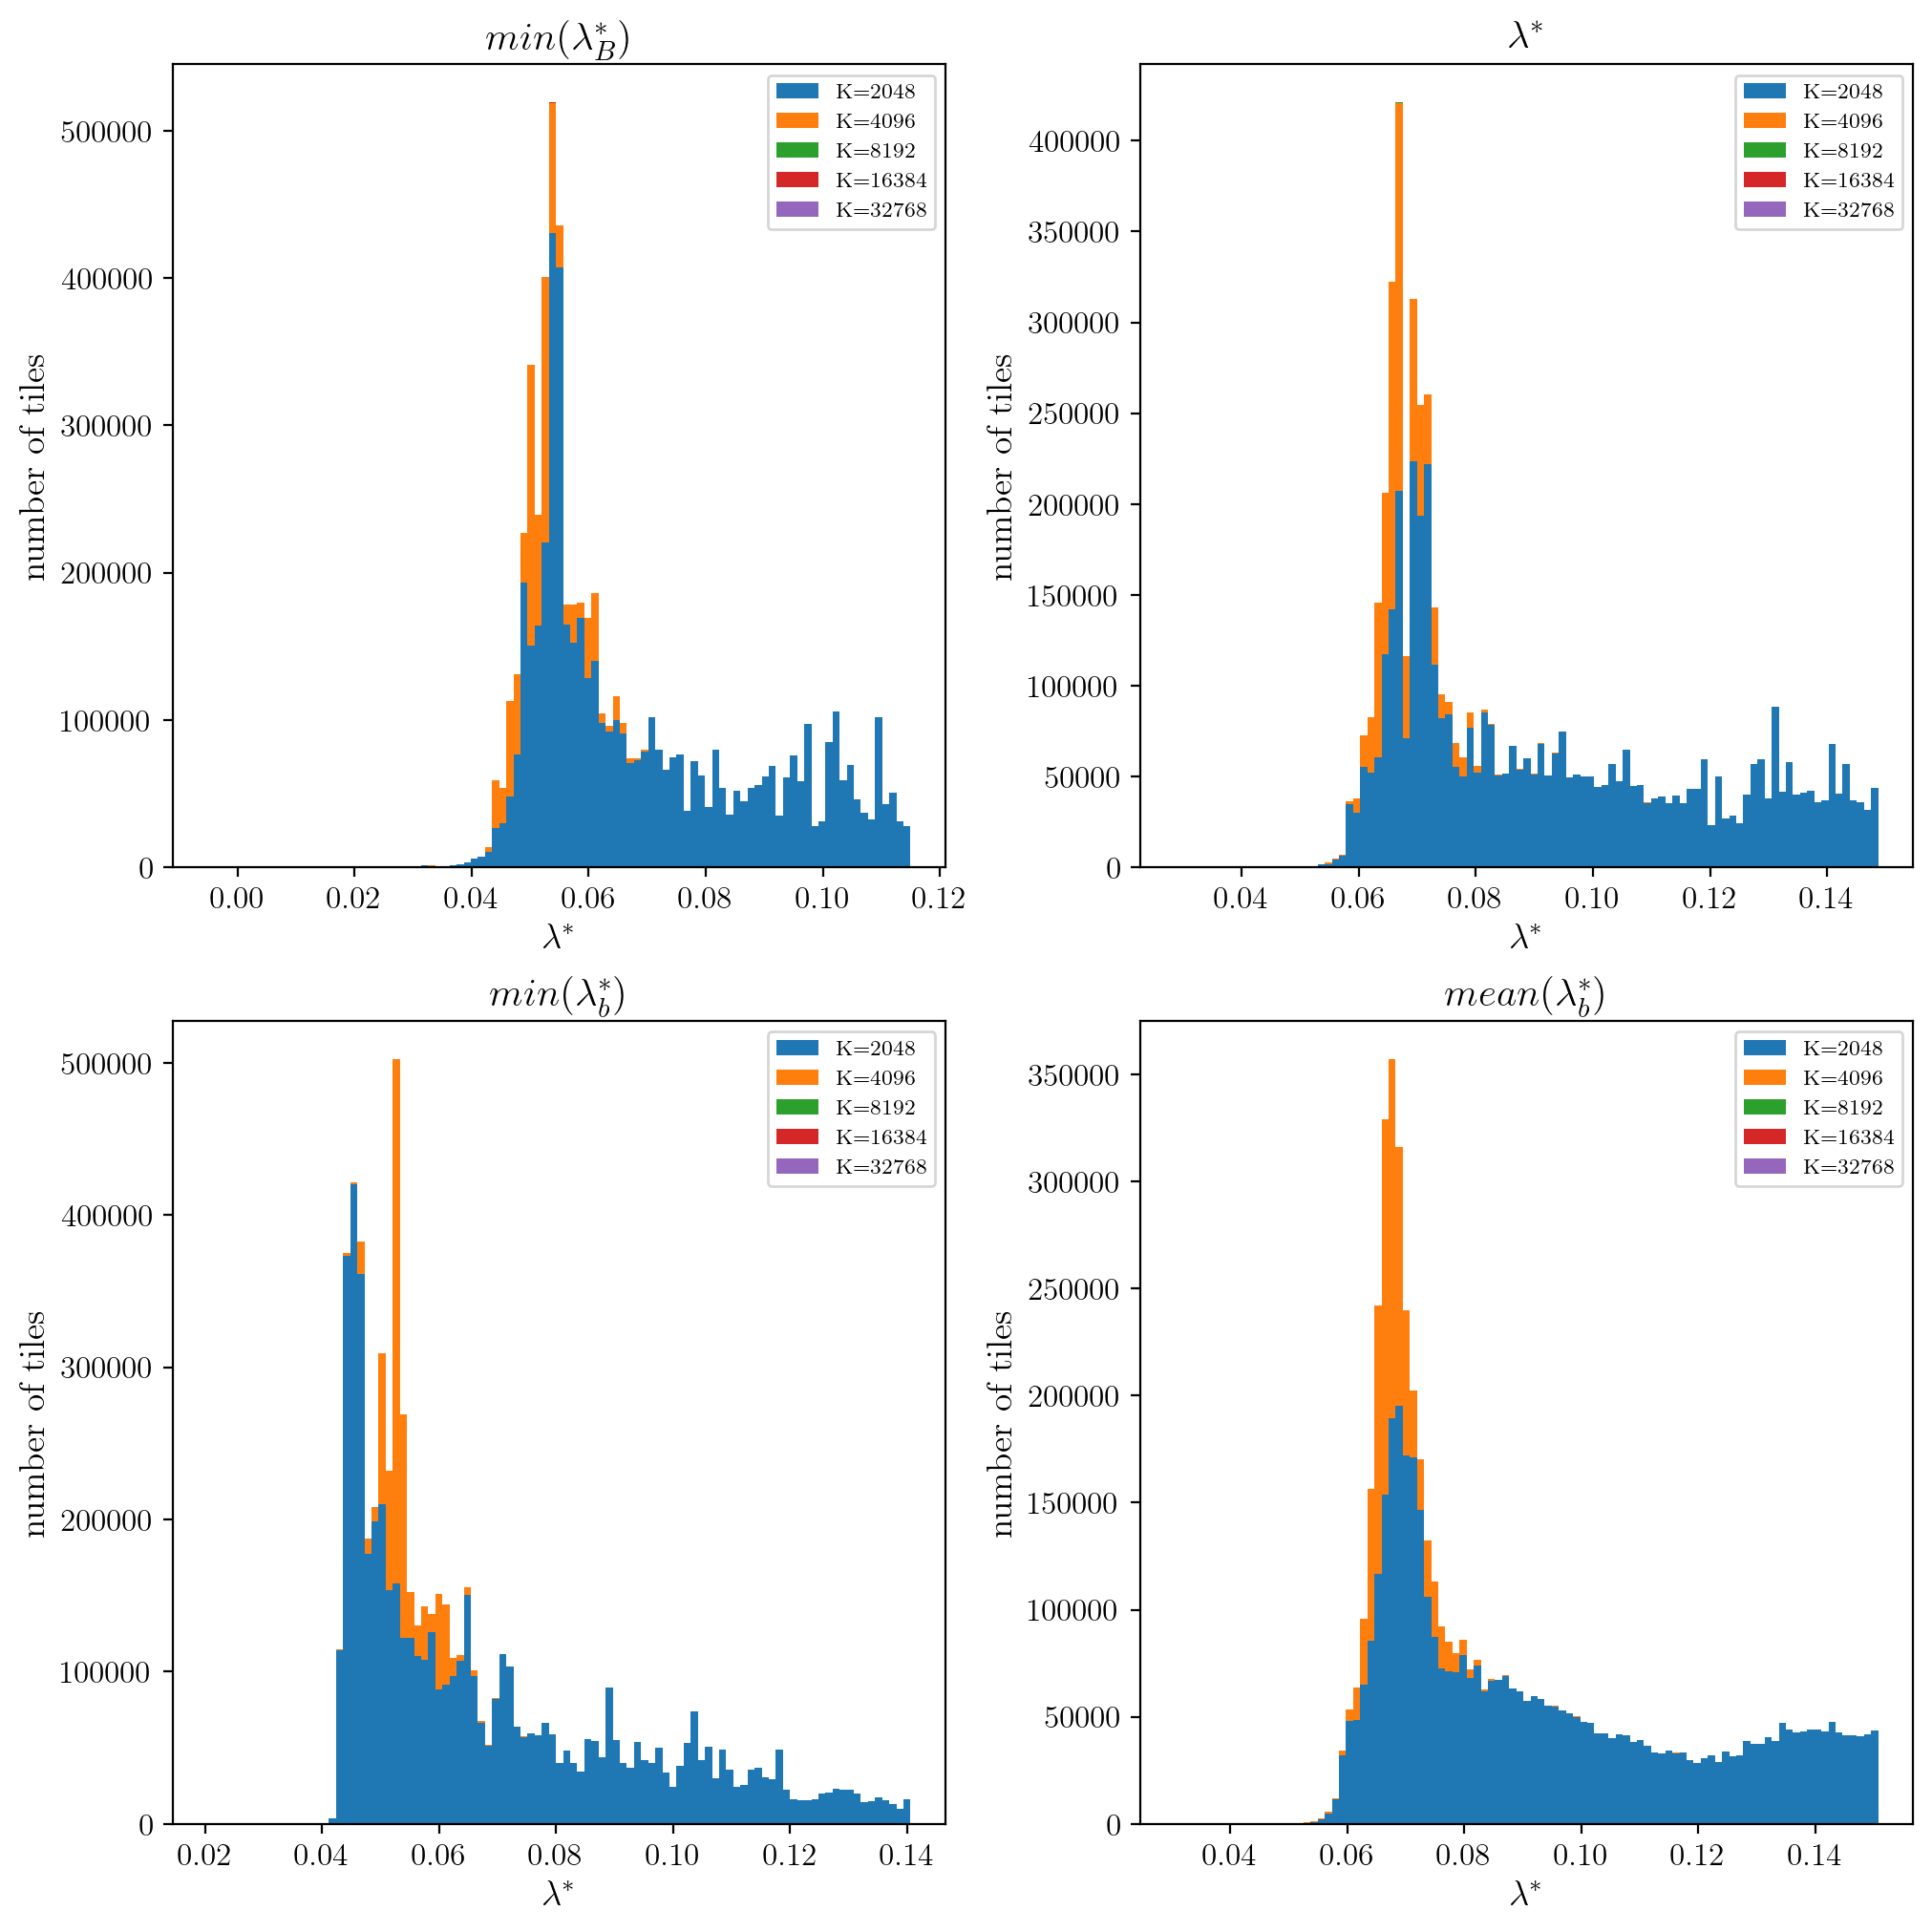

In [26]:
plt.figure(figsize=(10, 10), constrained_layout=True)
plt.subplot(2,2, 1)
plt.title('$min(\lambda^*_B)$')
lamstar_histogram(S.B_lam.min(axis=1), S.sim_sizes)
for i, (field, title) in enumerate([(S.orig_lam, '$\lambda^{*}$'), (S.twb_min_lam, '$min(\lambda^*_b)$'), (S.twb_mean_lam, '$mean(\lambda^*_b)$')]):
    plt.subplot(2,2,i + 2)
    plt.title(title)
    lamstar_histogram(field, S.sim_sizes)
plt.show()

## Resimulation

In [9]:
import pandas as pd
friends = np.where(bootstrap_cvs[:,0] < 0.045)[0]
print(pd.DataFrame(sim_sizes[friends]).describe())
print(pd.DataFrame(pointwise_target_alpha[friends]).describe())

                  0
count  34476.000000
mean    1160.053370
std      564.423262
min     1000.000000
25%     1000.000000
50%     1000.000000
75%     1000.000000
max     8000.000000
                  0
count  34476.000000
mean       0.006419
std        0.002901
min        0.000561
25%        0.004503
50%        0.004715
75%        0.010948
max        0.011460


In [10]:
seed = 0
src_key = jax.random.PRNGKey(seed)
key1, key2, key3 = jax.random.split(src_key, 3)

unifs = jax.random.uniform(key=key1, shape=(adap.max_sim_size,) + lei_obj.unifs_shape(), dtype=jnp.float32)
unifs_order = jnp.arange(0, unifs.shape[1])
nB_global = 30
nB_tile = 40
bootstrap_idxs = {
    K: jnp.concatenate((
        jnp.arange(K)[None, :],
        jax.random.choice(key2, K, shape=(nB_global, K), replace=True),
        jax.random.choice(key3, K, shape=(nB_tile, K), replace=True)
    )).astype(jnp.int32)
    for K in (adap.init_K * 2 ** np.arange(0, adap.n_sim_double + 1))
}

In [11]:
print('hi')

hi


In [12]:
which = friends[:4]
lamstar = lts.bootstrap_tune_runner(
    lei_obj,
    sim_sizes[which],
    pointwise_target_alpha[which],
    g.theta_tiles[which],
    g.null_truth[which],
    unifs,
    bootstrap_idxs,
    unifs_order,
    grid_batch_size=4
)

tuning for 1000 simulations with 3 tiles and batch size (4, 1000)


In [13]:
stats = np.random.rand(3, 1000)

In [38]:
from confirm.lewislib import batch
grid_batch_size=4
def printer(x, y, z):
    print(x.shape, y.shape, z.shape)
    return 0
tunev = jax.jit(jax.vmap(jax.vmap(lts.tune, in_axes=(None, 0, None)), in_axes=(0, None, 0)))
batched_tune = batch.batch(
    batch.batch(tunev, 10, in_axes=(None, 0, None), out_axes=(1,)),
    grid_batch_size, in_axes=(0, None, 0)
)
batched_tune(stats, bootstrap_idxs[1000], np.array([0.025, 0.025, 0.025])).shape

(3, 71)

In [31]:
bootstrap_idxs[1000].shape

(71, 1000)

In [28]:
batch.batch(lts.tunev, 10, in_axes=(None, 0, None))(stats[0], bootstrap_idxs[1000], 0.025).shape

(71,)

In [36]:
tunev(stats, bootstrap_idxs[1000], np.full(3, 0.025)).shape

(3, 71)

In [23]:
bootstrap_idxs[1000].shape

(71, 1000)

## Look at the worst case from bootstrap group 1.

- $\lambda^*$ is the tile-wise threshold
- $\lambda^{**}$ is the global minimum threshold.
-

- TODO: what is the right notation for the different $\lambda$??

These are points that will drive down $\lambda^*_B$

In [4]:
bootstrap_mins2 = bootstrap_cvs[:,1:-2].min(axis=1)
trixy = np.argsort(bootstrap_mins2)[:100]
print(bootstrap_mins2[trixy])
print(bootstrap_cvs[trixy, 0])
print(bootstrap_cvs[trixy, -2])
print(bootstrap_cvs[trixy, -1])

[0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.00514508
 0.00514508 0.00514508 0.00514508 0.00514508 0.00514508 0.00514508 0.00514508 0.00514508 0.00514508
 0.00514508 0.00514508 0.00514508 0.00514508 0.00514508 0.00514508 0.00514508 0.00514508 0.00514508
 0.00514508 0.00514508 0.00514508 0.00514508 0.00514508 0.00859748 0.00859748 0.01154261 0.01154261
 0.01154261 0.01154261 0.01154261 0.01154261 0.01154261 0.01154261 0.01154261 0.01154261 0.01154261
 0.01154261 0.01154261 0.01154261 0.01154261 0.01154261 0.01154261 0.01154261 0.01154261 0.01154261
 0.01154261 0.01154261 0.0115426

In [5]:
trixy = bootstrap_cvs[:, :-2].argmin(axis=0)
print(bootstrap_mins2[trixy])
print(bootstrap_cvs[trixy, 0])
print(bootstrap_cvs[trixy, -2])
print(bootstrap_cvs[trixy, -1])

[0.04354637 0.04354637 0.02789495 0.01429929 0.0269085  0.00859748 0.         0.04354637 0.02218252
 0.0393493  0.        ]
[0.04354637 0.04354637 0.08347789 0.12302681 0.07766329 0.11524351 0.10524046 0.04354637 0.20173591
 0.07177567 0.08327259]
[0.04354637 0.04354637 0.06162066 0.0683219  0.05937429 0.05981035 0.06252524 0.04354637 0.07761585
 0.0587158  0.05974139]
[0.04354637 0.04354637 0.09433731 0.11718224 0.07398375 0.23521529 0.1059908  0.04354637 0.22964628
 0.07535339 0.12694353]


In [6]:
pointwise_target_alpha[trixy], sim_sizes[trixy], g.radii[g.grid_pt_idx[trixy]]

(array([0.02050906, 0.02050906, 0.01170158, 0.00495953, 0.01116916, 0.00455338, 0.00462812,
        0.02050906, 0.00494191, 0.01693105, 0.00451102]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]),
 array([[0.00390625, 0.00390625, 0.00390625, 0.00390625],
        [0.00390625, 0.00390625, 0.00390625, 0.00390625],
        [0.015625  , 0.015625  , 0.015625  , 0.015625  ],
        [0.03125   , 0.03125   , 0.03125   , 0.03125   ],
        [0.015625  , 0.015625  , 0.015625  , 0.015625  ],
        [0.03125   , 0.03125   , 0.03125   , 0.03125   ],
        [0.03125   , 0.03125   , 0.03125   , 0.03125   ],
        [0.00390625, 0.00390625, 0.00390625, 0.00390625],
        [0.03125   , 0.03125   , 0.03125   , 0.03125   ],
        [0.0078125 , 0.0078125 , 0.0078125 , 0.0078125 ],
        [0.03125   , 0.03125   , 0.03125   , 0.03125   ]]))

In [12]:
import scipy.spatial
tree = scipy.spatial.KDTree(g.theta_tiles)

In [14]:
worst_tile_idx = np.argmin(bootstrap_cvs[:,0])
worst_tile = g.theta_tiles[worst_tile_idx]

slice_pt = worst_tile
plot_dims = [0, 1]
unplot_dims = list(set(range(g.d)) - set(plot_dims))

slicex = [-1, 1]
slicey = [-1, 1]
nx = ny = 100
xvs = np.linspace(*slicex, nx)
yvs = np.linspace(*slicey, ny)
grid = np.stack(np.meshgrid(xvs, yvs, indexing='ij'), axis=-1)
full_grid = np.empty((nx * ny, g.d))
full_grid[:, plot_dims] = grid.reshape(-1, 2)
full_grid[:, unplot_dims] = slice_pt[unplot_dims]

In [20]:
closest_idx[1]

array([ 127690,  127687,  127687,  127687,  127687,  127687,  127687,  127687,  127686,  127686,
       ...,   27258,   27258,   27258, 1102285, 1102285, 1102281,  308063, 3362909, 3362909,
       3382399])

In [15]:
closest_idx = tree.query(full_grid)
closest_idx

(array([0.87117257, 0.85748238, 0.84260622, 0.82795573, 0.81354311, 0.79938122, 0.78548363,
        0.7718646 , 0.75713012, 0.74239052, ..., 0.04222419, 0.03402861, 0.03673218, 0.02316994,
        0.02160324, 0.02009795, 0.02419237, 0.01947861, 0.01010055, 0.01235265]),
 array([ 127690,  127687,  127687,  127687,  127687,  127687,  127687,  127687,  127686,  127686,
        ...,   27258,   27258,   27258, 1102285, 1102285, 1102281,  308063, 3362909, 3362909,
        3382399]))

In [ ]:
eval_pts = 

20105


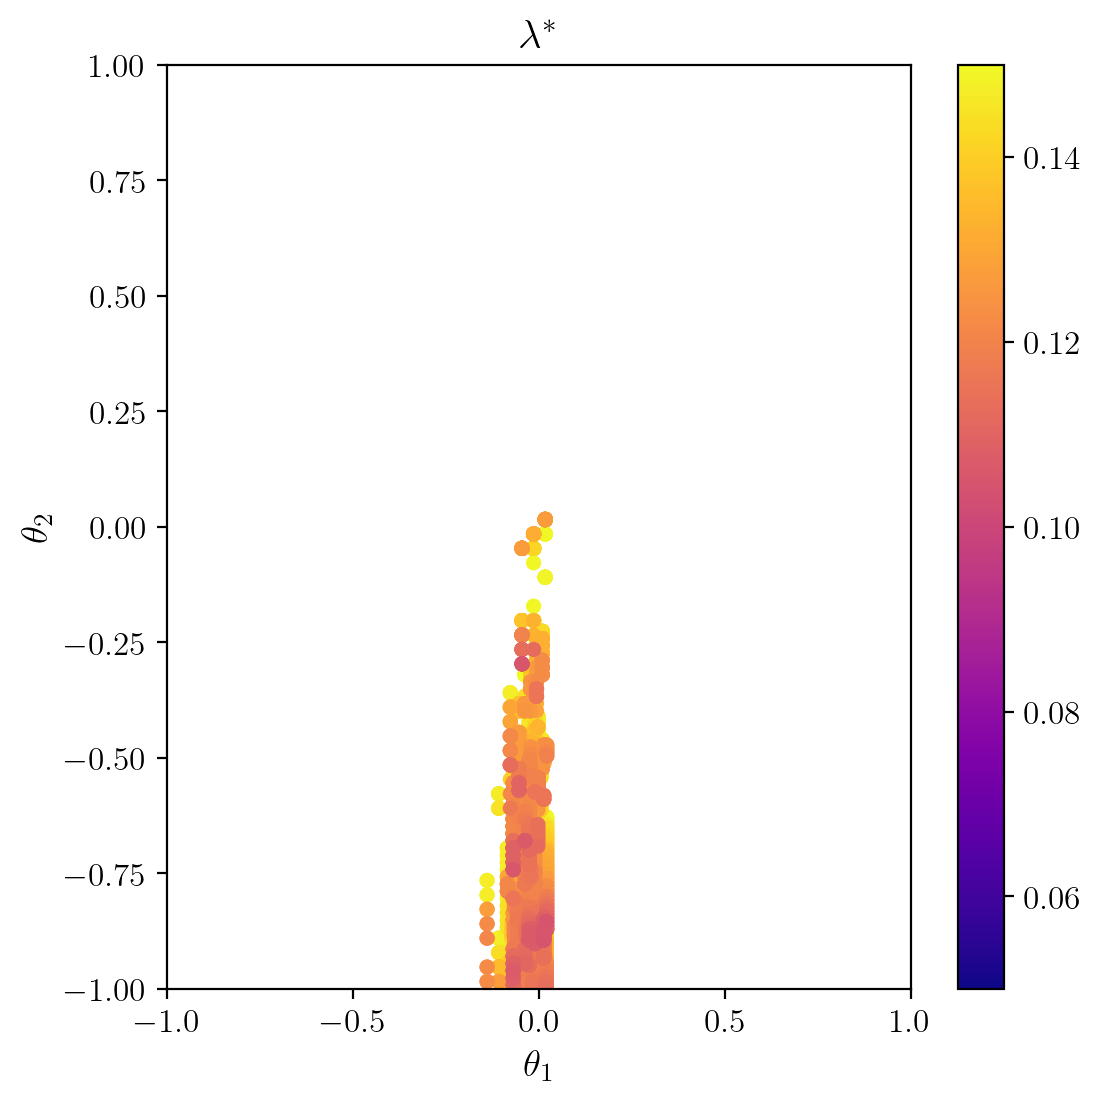

20282


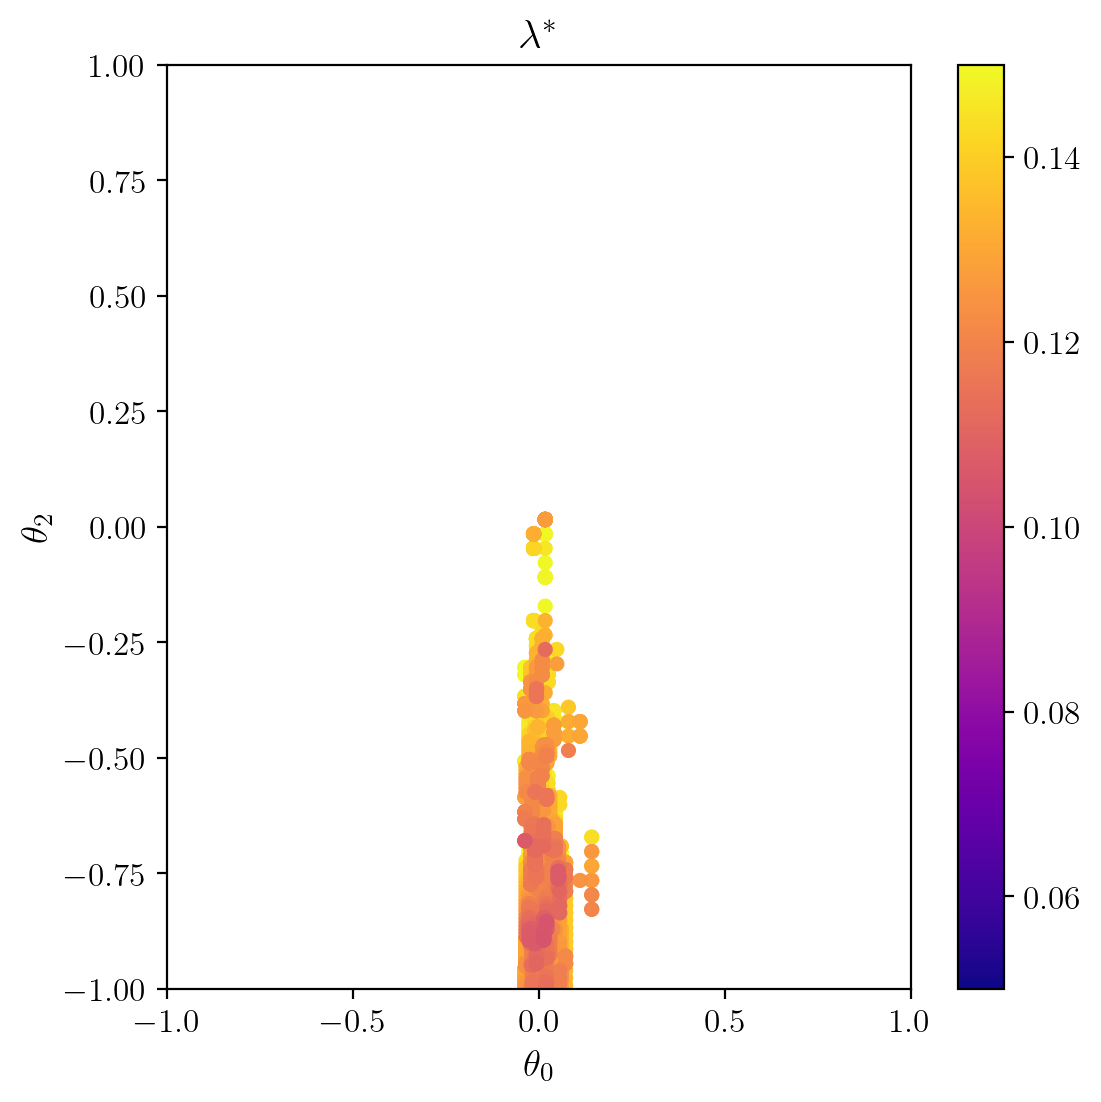

In [11]:
# worst_tile_idx = np.argmin(bootstrap_cvs[:,0])
# worst_tile = g.theta_tiles[worst_tile_idx]
# # def pandemonium(field):
# field = bootstrap_cvs[:,0]
# # for unplot_set in [{0, 1}, {1, 2}]:
# for unplot_set in [{0}, {1}]:
#     plot = list(set(range(n_arms)) - unplot_set)
#     unplot = list(unplot_set)
#     axis_slice = np.all(np.abs(g.theta_tiles[:, unplot] - (-0.01)) < 0.03, axis=-1)
#     select = np.where(axis_slice & (field < 0.15))[0]

#     ordered_select = select[np.argsort(field[select])[::-1]]
#     print(ordered_select.shape[0])

#     plt.figure(figsize=(6, 6))
#     plt.title(r"$\lambda^{*}$")
#     plt.scatter(
#         g.theta_tiles[ordered_select, plot[0]],
#         g.theta_tiles[ordered_select, plot[1]],
#         c=field[ordered_select],
#         vmin=0.05,
#         vmax=0.15,
#         s=20,
#     )
#     plt.xlim([-1, 1])
#     plt.ylim([-1, 1])
#     plt.colorbar()
#     plt.xlabel(f"$\\theta_{plot[0]}$")
#     plt.ylabel(f"$\\theta_{plot[1]}$")
#     plt.show()